# Data Reduction in Data Mining

In this tutorial, we will learn about Data Reduction and various techniques/methods involved in achieving that.

## Why do we need data reduction?

When data analysis and mining are done on a huge amount of data, then it takes a very long time to process, making it impractical and infeasible. Data reduction techniques are used to obtain a reduced representation of the dataset that is much smaller in volume by maintaining the integrity of the original data.



## Various methods of data reduction :

*   Dimensionality Reduction
*   Data Cube Aggregation
*   Data Compression
*   Discretization Operation
*   Numerosity Reduction

### Dimensionality Reduction :

Often in machine learning, the more features that are present in the dataset the better a classifier can learn. However, more features also mean a higher computational cost. Not only can high dimensionality lead to long training times, more features often lead to an algorithm overfitting as it tries to create a model that explains all the features in the data.

Because dimensionality reduction reduces the overall number of features, it can reduce the computational demands associated with training a model but also helps combat overfitting by keeping the features that will be fed to the model fairly.

We will discuss the methods of dimensionality reduction such as PCA.

PCA: 

Principal Component Analysis is a technique of feature extraction that maps a higher-dimensional feature space to a lower-dimensional feature space.

While reducing the number of dimensions, PCA ensures that maximum information of the original dataset is retained in the dataset with the reduced no. of dimensions and the co-relation between the newly obtained Principal Components is minimum. The new features obtained after applying PCA are called Principal Components and are denoted as PCi (i=1,2,3…n).

We will be using Iris dataset to understand the working of PCA technique in Data Reduction.

In [ ]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [ ]:
#Load the Dataset
iris = datasets.load_iris()
#convert the dataset into a pandas data frame
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
#display the head (first 5 rows) of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:>

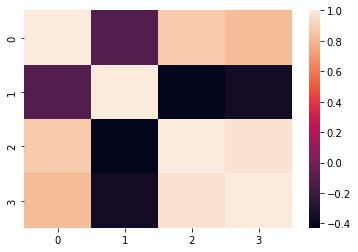

In [ ]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

<AxesSubplot:>

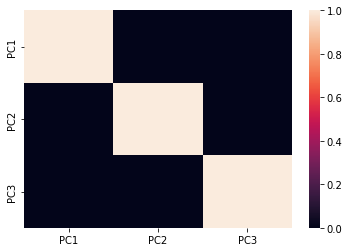

In [ ]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()


#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())



Findings:- The above heatmap clearly depicts that there is no correlation between various obtained 
principal components (PC1, PC2, and PC3). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum.

### Data Discretization :

Data discretization is the process of converting continuous data into discrete buckets by grouping it. Discretization is also known for easy maintainability of the data. Training a model with discrete data becomes faster and more effective than when attempting the same with continuous data. 

Although continuous-valued data contains more information, huge amounts of data can slow the model down. Here, discretization can help us strike a balance between both. Some famous methods of data discretization are binning and using a histogram.

The main challenge in discretization is to choose the number of intervals or bins and how to decide on their width. Here we make use of a function called pandas.cut(). This function is useful to achieve the bucketing and sorting of segmented data. 

In this exercise, we will load the Student_bucketing.csv dataset and perform bucketing. The dataset consists of student details such as Student_id, Age, Grade, and marks.

In [ ]:
# initialize list of lists
data = [['tom', 12, '1st Class', 29],['Harry', 12, '1st Class', 50],['Ben', 12, '1st Class', 10], ['nick', 15, '3rd Class', 70], ['juli', 14, '2nd Class', 90]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Student_id', 'Age', 'Grade', 'Marks'])
  
# print dataframe.
df

,Student_id,Age,Grade,Marks
0,tom,12,1st Class,29
1,Harry,12,1st Class,50
2,Ben,12,1st Class,10
3,nick,15,3rd Class,70
4,juli,14,2nd Class,90


Perform bucketing using the pd.cut() function on the marks column and display the top 10 columns. The cut() function takes parameters such as x, bins, and labels. 

In [ ]:
df['bucket']=pd.cut(df['Marks'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])

df.head(10)

,Student_id,Age,Grade,Marks,bucket
0,tom,12,1st Class,29,Below_average
1,Harry,12,1st Class,50,Average
2,Ben,12,1st Class,10,Poor
3,nick,15,3rd Class,70,Above_Average
4,juli,14,2nd Class,90,Excellent


### Numerosity Reduction:

The numerosity reduction reduces the original data volume and represents it in a much smaller form. This technique includes two types parametric and non-parametric numerosity reduction.

Parametric:  Parametric numerosity reduction incorporates storing only data parameters instead of the original data. One method of parametric numerosity reduction is the Linear regression.

Non-Parametric: A non-parametric numerosity reduction technique does not assume any model. The non-Parametric technique results in a more uniform reduction, irrespective of data size, but it may not achieve a high volume of data reduction like the parametric. There are at least four types of Non-Parametric data reduction techniques, Histogram, Clustering, Sampling, Data Cube Aggregation, and Data Compression.

We will discuss about Linear Regression(Parametric Numerosity Reduction) in detail:

Where can Linear Regression be used?
It is a very powerful technique and can be used to understand the factors that influence profitability. It can be used to forecast sales in the coming months by analyzing the sales data for previous months.

What is Linear Regression?
The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable). When there is only feature it is called Uni-variate Linear Regression and if there are multiple features, it is called Multiple Linear Regression.

Hypothesis of Linear Regression
The linear regression model can be represented by the following equation:

Y = a + b*X + e.
where, a defines the intercept, b defines the slope of the regression line, e defines the error, and X and Y define the predictor and target variables, accordingly. 


Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875007


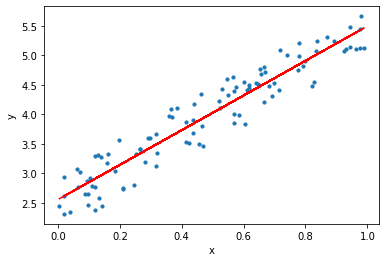

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)


# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

## References:
*    https://towardsdatascience.com/collect-data-from-twitter-a-step-by-step-implementation-using-tweepy-7526fff2cb31
*    https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Data Reduction by Bhawneet Singh is licensed under [CC BY NC SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). It is inspired by the referenced blogs.